# Task 2- Prediction Using Unsupervised ML

## AIM :
*PREDICT THE OPTIUM NUMBER OF CLUSTERS AND REPRESENT IT VISUALLY FROM GIVEN IRIS DATA*

To achieve this we will be using **K-Means Clustering** which is a **Unsupervised ML algorithm** and the **IRIS** dataset.

### Unsupervised vs Supervised Learning:
* Unsupervised is a type of machine learning algorithm that happens without human supervision.A machine tries to find any patterns in data by itself. The model is given only input variable and no corresponding output data. Applicable in **clustering** type problems.

* Supervised is a type of machine learning algorithm that happens in the presence of human supervision, meaning people label input data with answer keys showing a machine the desired output. The model is given input and output variables and an algorithm to learn the function from input to output.Applicable in **classification** and **regression** type problems.

## Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Reading the Dataset

In [2]:
data = pd.read_csv("D:\Edu\GRIP\Iris.csv")

In [3]:
data.head()     #returns top 5 rows of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# to display no. of samples on each class
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

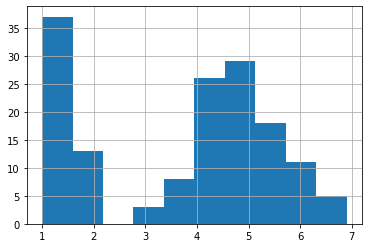

In [8]:
data['PetalLengthCm'].hist()

<AxesSubplot:>

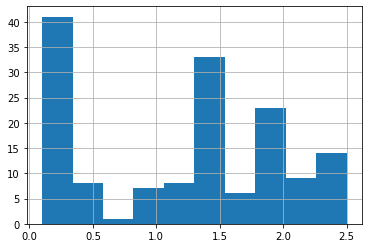

In [9]:
data['PetalWidthCm'].hist()

<AxesSubplot:>

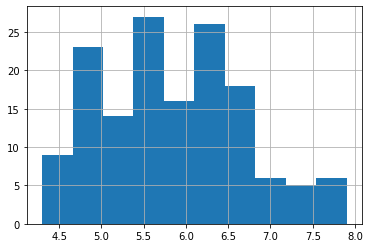

In [11]:
data['SepalLengthCm'].hist()

<AxesSubplot:>

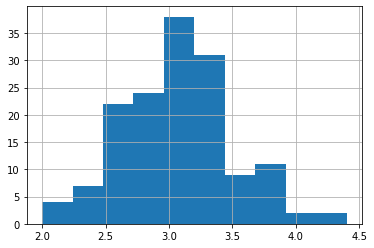

In [13]:
data['SepalWidthCm'].hist()

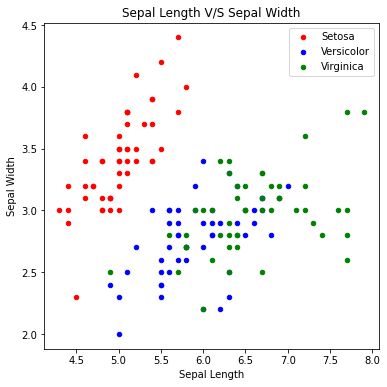

In [19]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label="Setosa")
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label="Versicolor",ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label="Virginica",ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length V/S Sepal Width')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

## K-Means Clustering

Clustering can be done by following Steps :-

* Select the no.of clusters you want to identify in your data. In this case, we are going to use 3 clusters for 3 iris types. Therefore, K=3.
* Random selection of 3 distinct datapoints. Those points are initial Clusters.
* Measuring the distance between first point and 3 initial clusters assign the first point to the nearest initial cluster.
* Continue Step 3 for remaining points till we get 3 different clusters.
* Calculate the mean of ech cluster.

In [21]:
# Creating a new dataframe using petal length and petal width of iris dataset.
df = pd.DataFrame({'x':data['PetalLengthCm'],'y':data['PetalWidthCm']})
df.head()

,x,y
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [23]:
# defining its cluster value to each species of iris
data.loc[data['Species']=='Iris-setosa','cluster']= '0'
data.loc[data['Species']=='Iris-versicolor','cluster']= '1'
data.loc[data['Species']=='Iris-virginica','cluster']= '2'
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [24]:
# adding the cluster to the new dataframe created using petal length and petal width
df['cluster']=data['cluster']
df

,x,y,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [25]:
from sklearn.cluster import KMeans
KMean = KMeans(n_clusters=3)
KMean.fit(df)

C:\Users\aftaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
kmeans=KMeans(n_clusters=3 , init='k-means++' , max_iter=300 , n_init=10 , random_state=0)
centroid=kmeans.fit_predict(df.values)

C:\Users\aftaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


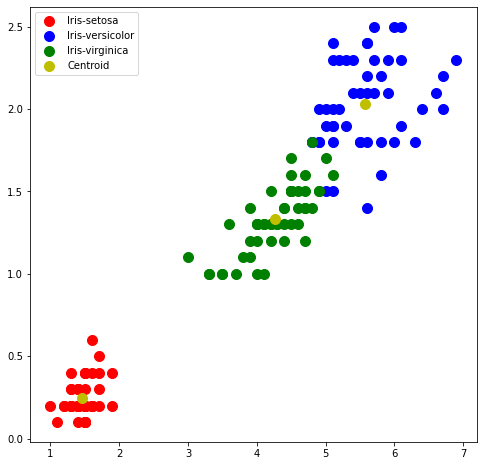

In [35]:
plt.figure(figsize=(8,8))

plt.scatter(df.values[centroid == 0 , 0] , df.values[centroid == 0 , 1] , s=100 , c='r' , label='Iris-setosa')
plt.scatter(df.values[centroid == 1 , 0] , df.values[centroid == 1 , 1] , s=100 , c='b' , label='Iris-versicolor')
plt.scatter(df.values[centroid == 2 , 0] , df.values[centroid == 2 , 1] , s=100 , c='g' , label='Iris-virginica')


plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , s=100 , c='y' , label='Centroid')
plt.legend()

## Conclusion

Therefore the optimal number of clusters predicted is **3**.